### Import Library

In [1086]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import RandomizedSearchCV

In [1087]:
df = pd.read_csv('employee.csv')
df.head(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


* Username: User's username.
* EnterpriseID: ID associated with the enterprise or organization.
* StatusPernikahan: Marital status of the individual.
* JenisKelamin: Gender of the individual.
* StatusKepegawaian: Employment status of the individual.
* Pekerjaan: Occupation or job title of the individual.
* JenjangKarir: Career level or progression of the individual.
* PerformancePegawai: Employee performance rating or evaluation.
* AsalDaerah: Region or place of origin of the individual.
* HiringPlatform: Platform or method used for hiring or recruitment.
* SkorSurveyEngagement: Engagement survey score.
* SkorKepuasanPegawai: Employee satisfaction score.
* JumlahKeikutsertaanProjek: Number of project participations.
* JumlahKeterlambatanSebulanTerakhir: Number of late occurrences in the last month.
* JumlahKetidakhadiran: Total number of absences.
* NomorHP: Phone number of the individual.
* Email: Email address of the individual.
* TingkatPendidikan: Education level of the individual.
* PernahBekerja: Whether the individual has worked previously.
* IkutProgramLOP: Participation in the LOP (likely a specific program or initiative).
* AlasanResign: Reason for resigning from the job.
* TanggalLahir: Date of birth of the individual.
* TanggalHiring: Date of hiring or employment start date.
* TanggalPenilaianKaryawan: Date of employee performance evaluation.
* TanggalResign: Date of resignation from the job.

## Data Preprocessing

In [1088]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

### Handle Duplikat

In [1089]:
print(df.duplicated().sum())

0


In [1090]:
# check for duplicate data in the Username column
df['Username'].duplicated().sum()

2

In [1091]:
# Remove duplicate data based on column 'Username'
df.drop_duplicates(subset=['Username'], inplace=True)

# Displays the number of duplicate records after deletion
print(df['Username'].duplicated().sum())


0


In [1092]:
# Displays a unique value in a specified column
unique_values = df['PernahBekerja'].unique()
print(unique_values)

['1' 'yes']


In [1093]:
# Replace the values ​​that don't match
df['PernahBekerja'].replace('yes', 1, inplace=True)

In [1094]:
# Displays the results of changes
print(df['PernahBekerja'])

0      1
1      1
2      1
3      1
4      1
      ..
282    1
283    1
284    1
285    1
286    1
Name: PernahBekerja, Length: 285, dtype: object


#### Change column data type

In [1095]:
# Change column data type 'PernahBekerja' dan 'IkutProgramLOP' menjadi integer, JumlahKeikutsertaanProjek, JumlahKeterlambatanSebulanTerakhir, etc.
df['PernahBekerja'] = pd.to_numeric(df['PernahBekerja'], errors='coerce').astype(pd.Int64Dtype())
df['IkutProgramLOP'] = pd.to_numeric(df['IkutProgramLOP'], errors='coerce').astype(pd.Int64Dtype())
df['JumlahKeikutsertaanProjek'] = pd.to_numeric(df['JumlahKeikutsertaanProjek'], errors='coerce').astype(pd.Int64Dtype())
df['JumlahKeterlambatanSebulanTerakhir'] = pd.to_numeric(df['JumlahKeterlambatanSebulanTerakhir'], errors='coerce').astype(pd.Int64Dtype())
df['JumlahKetidakhadiran'] = pd.to_numeric(df['JumlahKetidakhadiran'], errors='coerce').astype(pd.Int64Dtype())

# Change column data type 'TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign' menjadi datetime
df['TanggalLahir'] = pd.to_datetime(df['TanggalLahir'], errors='coerce')
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'], errors='coerce')
df['TanggalPenilaianKaryawan'] = pd.to_datetime(df['TanggalPenilaianKaryawan'], errors='coerce')
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'], errors='coerce')


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            285 non-null    object        
 1   EnterpriseID                        285 non-null    int64         
 2   StatusPernikahan                    285 non-null    object        
 3   JenisKelamin                        285 non-null    object        
 4   StatusKepegawaian                   285 non-null    object        
 5   Pekerjaan                           285 non-null    object        
 6   JenjangKarir                        285 non-null    object        
 7   PerformancePegawai                  285 non-null    object        
 8   AsalDaerah                          285 non-null    object        
 9   HiringPlatform                      285 non-null    object        
 10  SkorSurveyEngagement      

#### Removes Unique Value with one Constant

In [1096]:
# Identifies a column with a single unique value
constant_columns = []
for column in df.columns:
    if df[column].nunique() == 1:
        constant_columns.append(column)

# Deletes columns with one unique value
df.drop(constant_columns, axis=1, inplace=True)


In [1097]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 286
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            285 non-null    object        
 1   EnterpriseID                        285 non-null    int64         
 2   StatusPernikahan                    285 non-null    object        
 3   JenisKelamin                        285 non-null    object        
 4   StatusKepegawaian                   285 non-null    object        
 5   Pekerjaan                           285 non-null    object        
 6   JenjangKarir                        285 non-null    object        
 7   PerformancePegawai                  285 non-null    object        
 8   AsalDaerah                          285 non-null    object        
 9   HiringPlatform                      285 non-null    object        
 10  SkorSurveyEngagement      

data dibagi menjadi data katgorik dan Numerik

In [1098]:
Categorical= ['StatusPernikahan', 'JenisKelamin','StatusKepegawaian','Pekerjaan', 'JenjangKarir', 'PerformancePegawai',
              'AsalDaerah', 'HiringPlatform', 'TingkatPendidikan','AlasanResign']
Numerical = ['SkorSurveyEngagement','SkorKepuasanPegawai','JumlahKeikutsertaanProjek','JumlahKeterlambatanSebulanTerakhir',
             'JumlahKetidakhadiran']

Date = ['TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalPenilaianKaryawan']

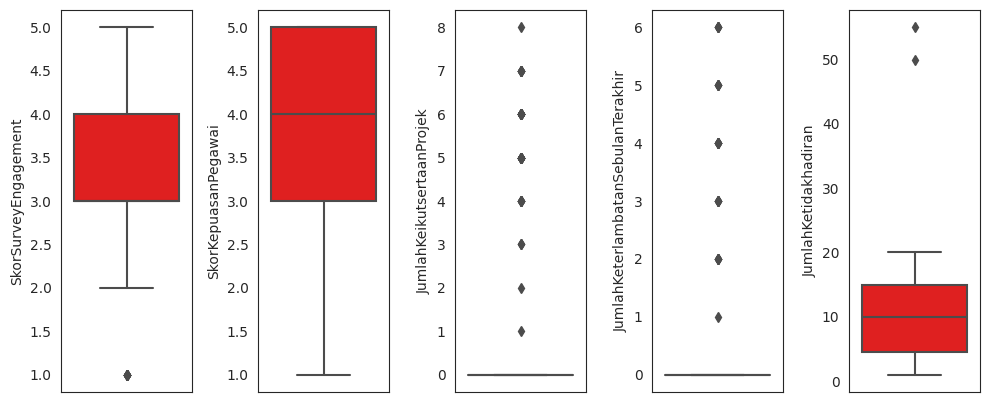

In [1099]:
plt.figure(figsize=(10,20))
for i in range(0, len(Numerical)):
    plt.subplot(len(Numerical), 5,i+1)
    sns.boxplot(y=df[Numerical[i]], color='red', orient='v')
    plt.tight_layout()

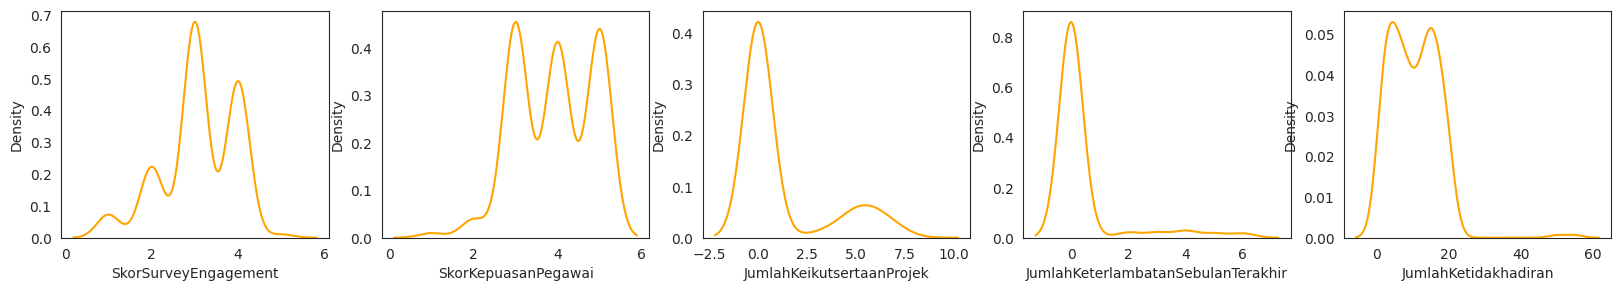

In [1100]:
plt.figure(figsize=(20, 10))
for i in range(len(Numerical)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df[Numerical[i]].astype(float), color='orange')

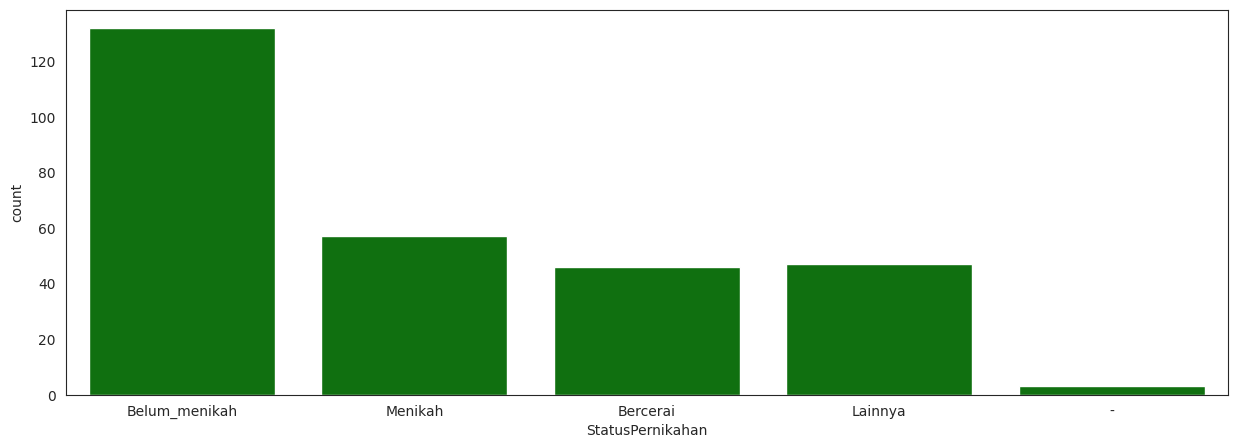

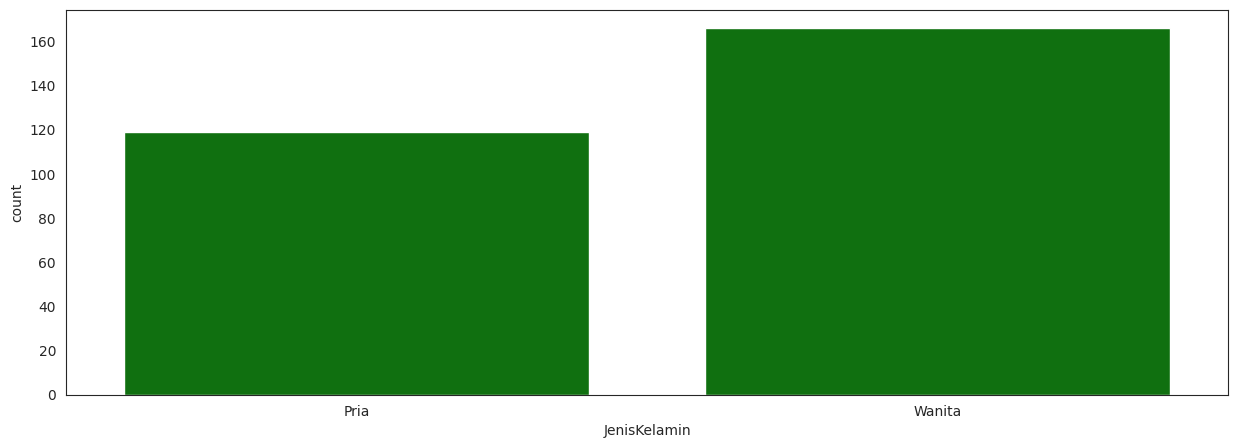

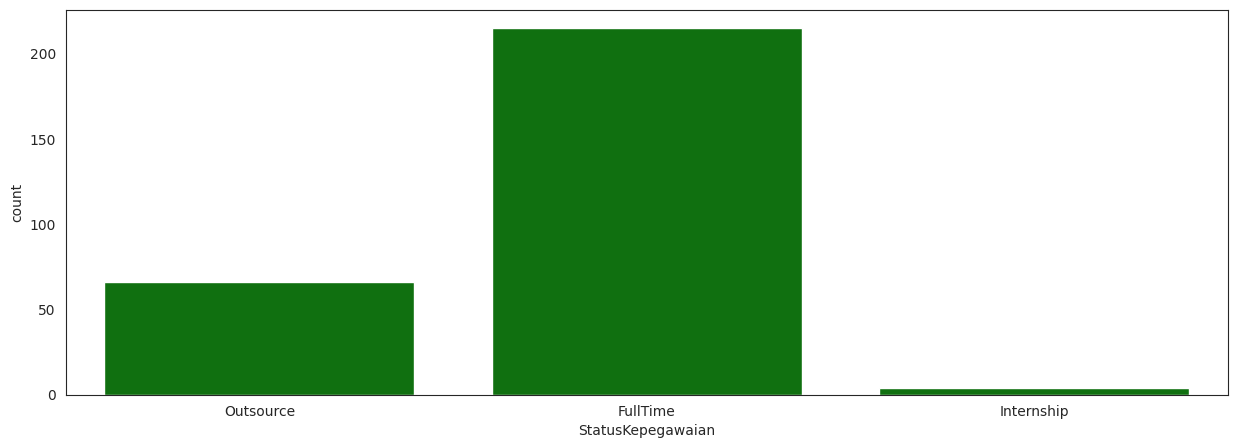

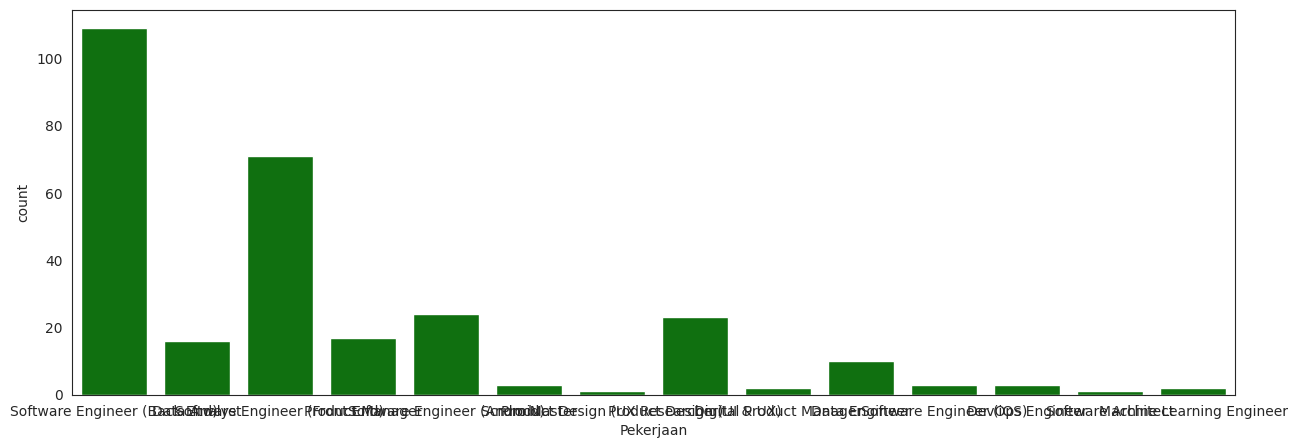

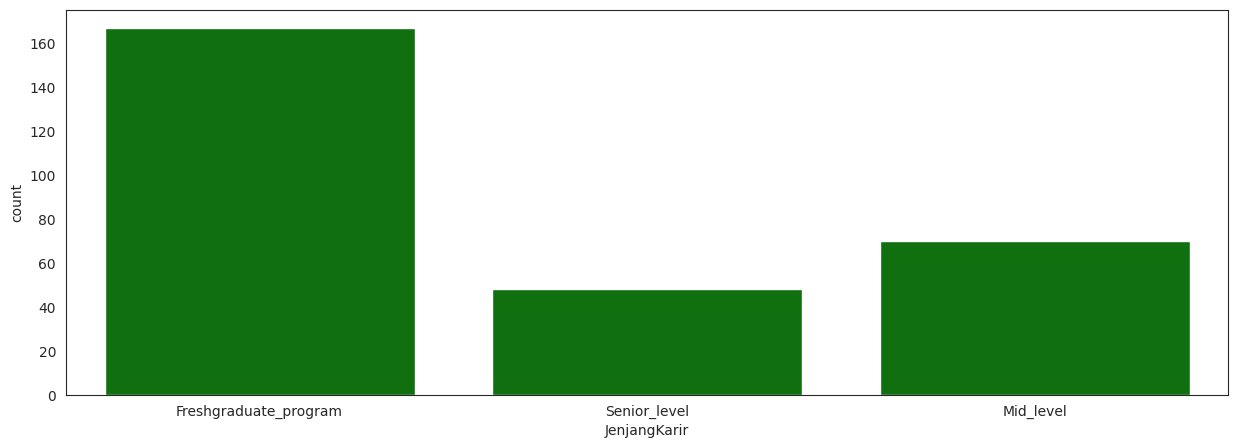

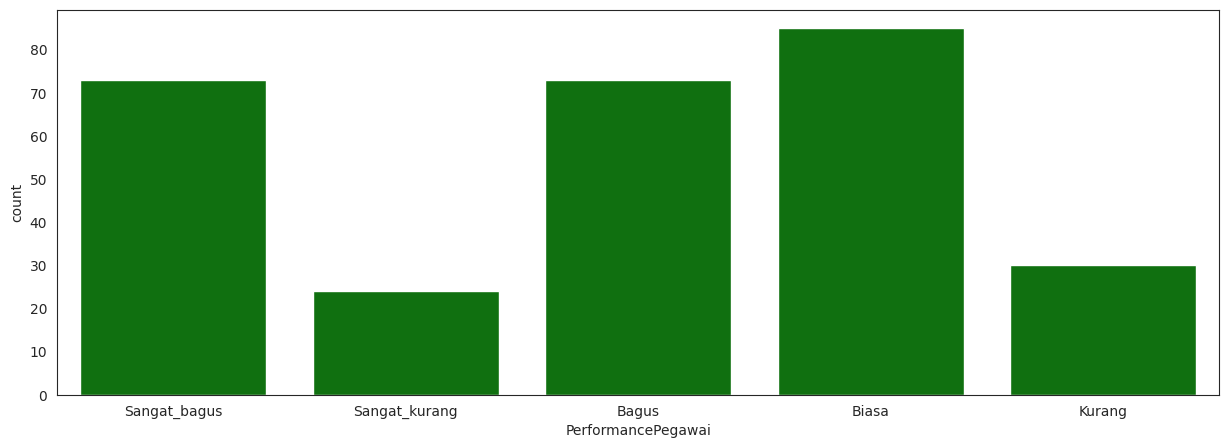

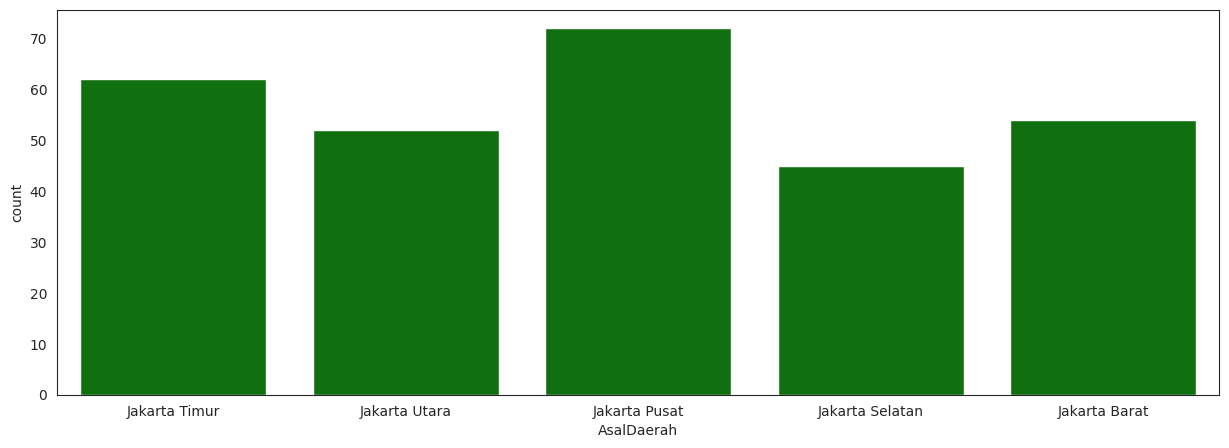

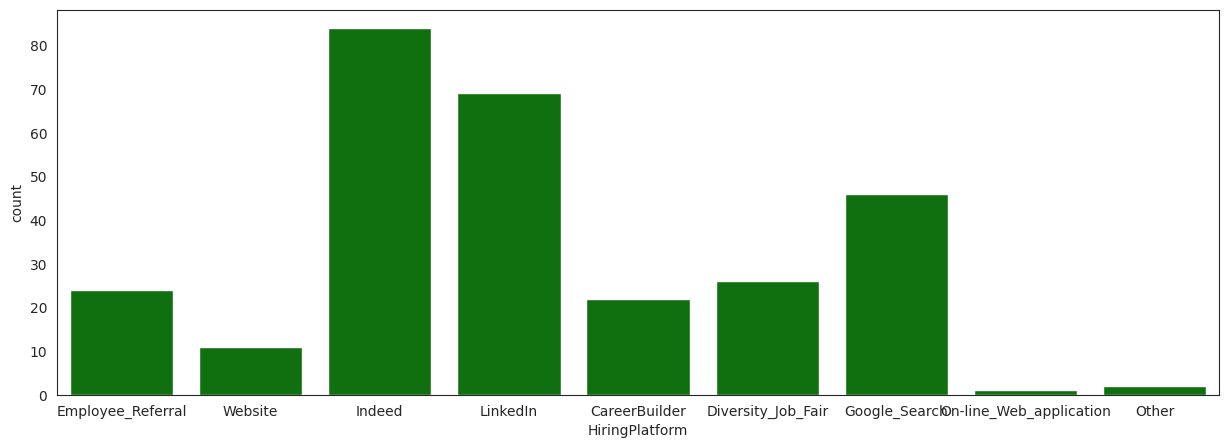

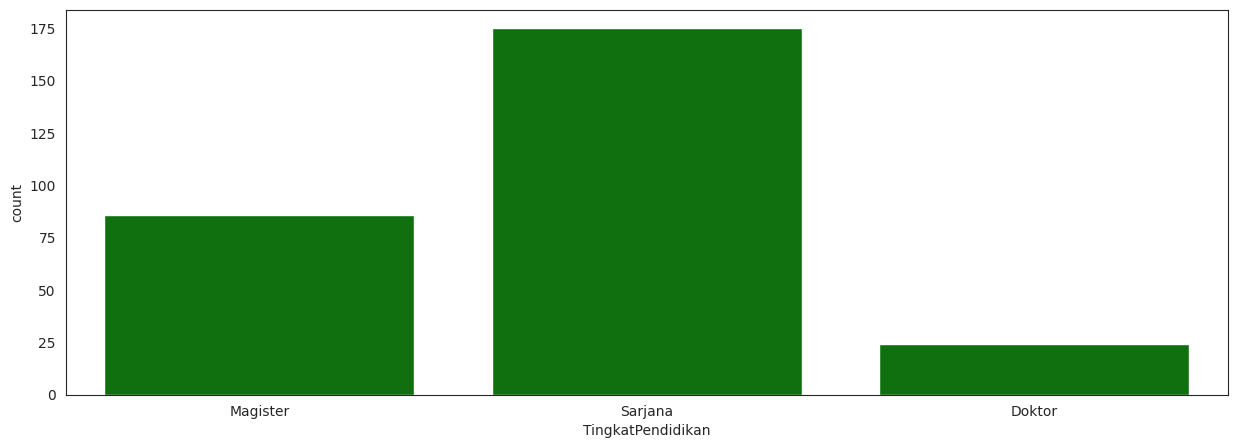

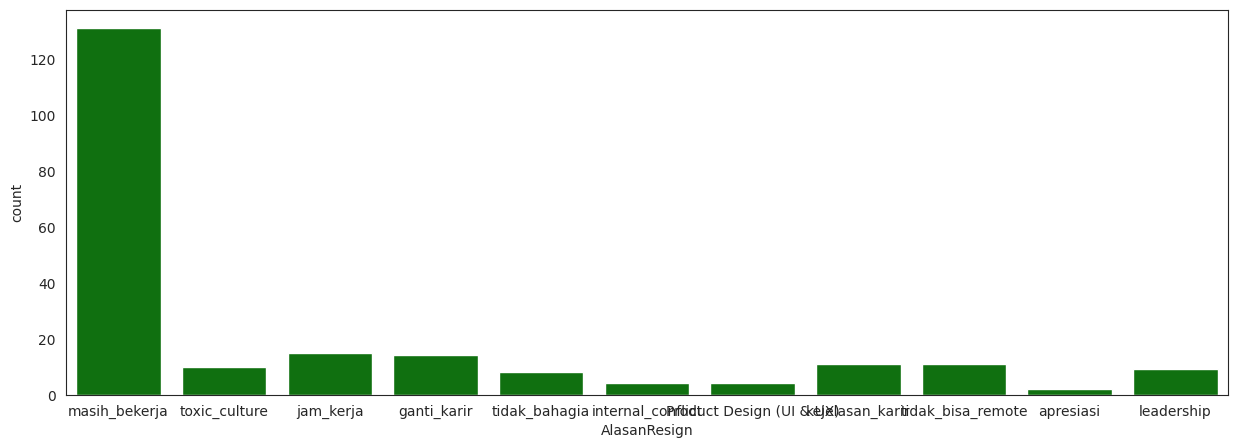

In [1101]:
for i in range(len(Categorical)):
    plt.figure(figsize=(15,5))
    sns.countplot(x=df[Categorical[i]], data=df, color='green')

# Multivariate Analysis

<ipython-input-1102-e7a9925f8813>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


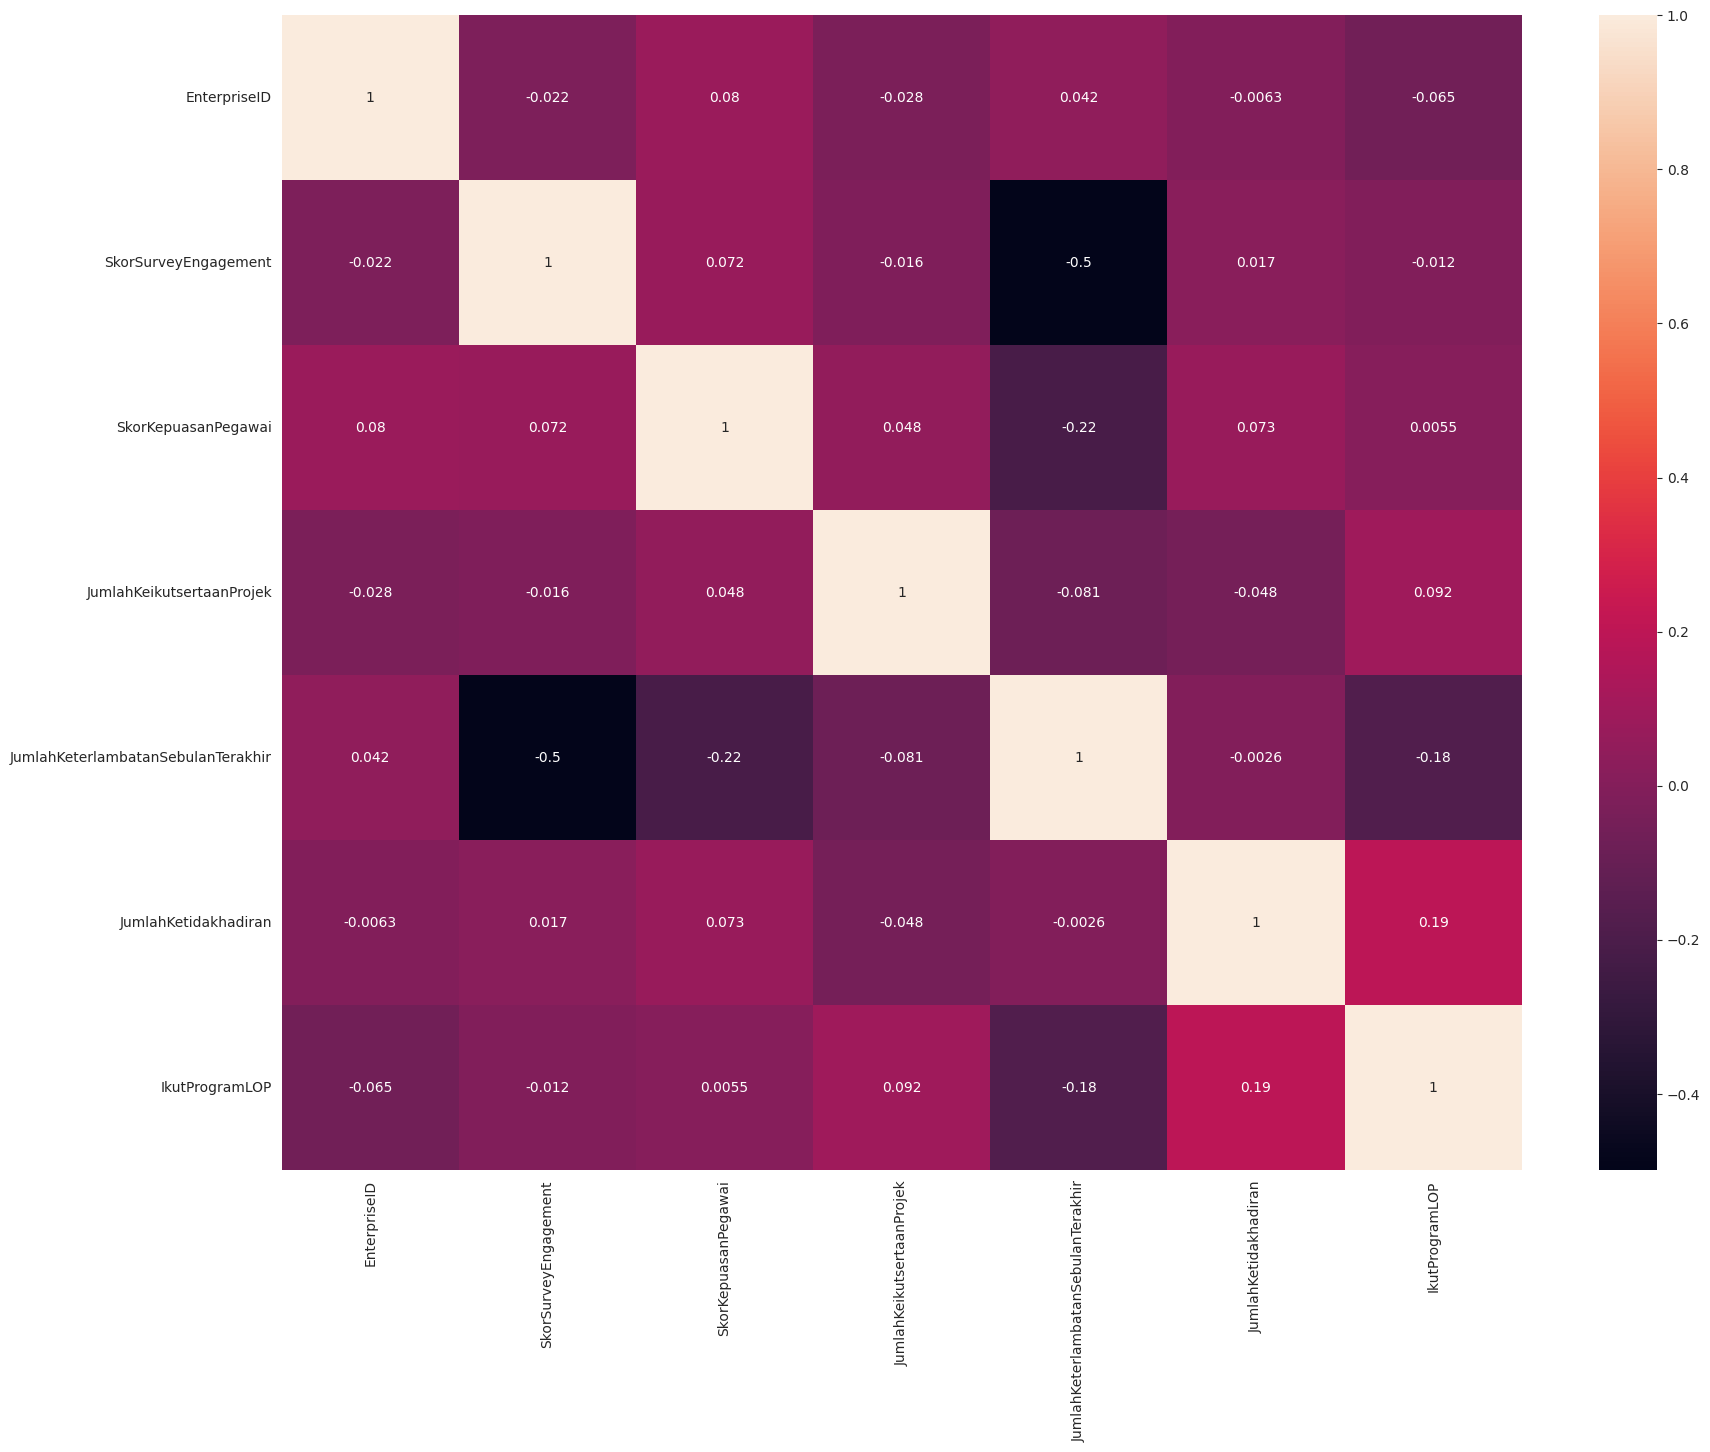

In [1102]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [1103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 286
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            285 non-null    object        
 1   EnterpriseID                        285 non-null    int64         
 2   StatusPernikahan                    285 non-null    object        
 3   JenisKelamin                        285 non-null    object        
 4   StatusKepegawaian                   285 non-null    object        
 5   Pekerjaan                           285 non-null    object        
 6   JenjangKarir                        285 non-null    object        
 7   PerformancePegawai                  285 non-null    object        
 8   AsalDaerah                          285 non-null    object        
 9   HiringPlatform                      285 non-null    object        
 10  SkorSurveyEngagement      

#### Aggregate the number of incoming and outgoing employees based on the year of hiring and year of resignation

In [1104]:

# Converts Hiring Date and Resign Date to hiring and resign years
df['TahunHiring'] = pd.to_datetime(df['TanggalHiring']).dt.year
df['TahunResign'] = pd.to_datetime(df['TanggalResign']).dt.year
df

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,Email,TingkatPendidikan,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,TahunHiring,TahunResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,spiritedPorpoise3135@yahoo.com,Magister,1,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,NaT,2011,NaN
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,jealousGelding2239@yahoo.com,Sarjana,1,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-06-16,2014,2018.0
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,pluckyMuesli3961@icloud.com,Magister,1,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24,2011,2014.0
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,stressedTruffle1406@hotmail.com,Sarjana,0,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,NaT,2014,NaN
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,shyTermite7149@gmail.com,Sarjana,0,ganti_karir,1974-11-07,2013-11-11,2020-01-22,2018-09-06,2013,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,dopeySheep0,106034,Belum_menikah,Wanita,FullTime,Data Engineer,Mid_level,Bagus,Jakarta Pusat,Google_Search,...,dopeySheep0297@icloud.com,Sarjana,<NA>,NaN,1973-12-08,2011-09-26,2016-03-01,NaT,2011,NaN
283,yearningPorpoise4,106254,-,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Timur,LinkedIn,...,yearningPorpoise4421@yahoo.com,Sarjana,<NA>,jam_kerja,1974-12-01,2013-05-13,2020-01-28,2017-11-15,2013,2017.0
284,murkySausage9,110433,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Pusat,Diversity_Job_Fair,...,murkySausage9688@yahoo.com,Sarjana,1,ganti_karir,1969-10-30,2013-11-11,2020-01-21,2018-06-08,2013,2018.0
285,truthfulMoth4,110744,Belum_menikah,Pria,FullTime,Software Engineer (Android),Mid_level,Bagus,Jakarta Utara,Google_Search,...,truthfulMoth4663@yahoo.com,Sarjana,0,kejelasan_karir,1981-10-01,2011-05-16,2014-04-05,2018-04-01,2011,2018.0


In [1105]:
df1 = df.groupby('TahunHiring').agg({'Username': 'count'}).reset_index()
df1 = df1.rename(columns={'Username': 'Karyawan Masuk'})
df2 = df.groupby('TahunResign').agg({'Username': 'count'}).reset_index()
df2 = df2.rename(columns={'Username': 'Karyawan Keluar'})
df3 = pd.merge(df1, df2, left_on='TahunHiring', right_on='TahunResign', how='outer')
df_combined= df3.fillna(0).astype(int)


df_combined

,TahunHiring,Karyawan Masuk,TahunResign,Karyawan Keluar
0,2006,1,0,0
1,2007,2,0,0
2,2008,2,0,0
3,2009,7,0,0
4,2010,8,0,0
5,2011,76,0,0
6,2012,41,0,0
7,2013,42,2013,5
8,2014,56,2014,11
9,2015,31,2015,8


#### Calculate the total number of existing employees

In [1106]:
# Calculating the total number of employees who resigned and are still surviving
df_combined['Total Resign'] = df_combined['Karyawan Keluar']
df_combined['Total Bertahan'] = df_combined['Karyawan Masuk'] - df_combined['Total Resign']

# calculate employee change
df_combined['Perubahan'] = df_combined['Total Bertahan'] - df_combined['Total Resign']

df_combined

,TahunHiring,Karyawan Masuk,TahunResign,Karyawan Keluar,Total Resign,Total Bertahan,Perubahan
0,2006,1,0,0,0,1,1
1,2007,2,0,0,0,2,2
2,2008,2,0,0,0,2,2
3,2009,7,0,0,0,7,7
4,2010,8,0,0,0,8,8
5,2011,76,0,0,0,76,76
6,2012,41,0,0,0,41,41
7,2013,42,2013,5,5,37,32
8,2014,56,2014,11,11,45,34
9,2015,31,2015,8,8,23,15


## Visualization

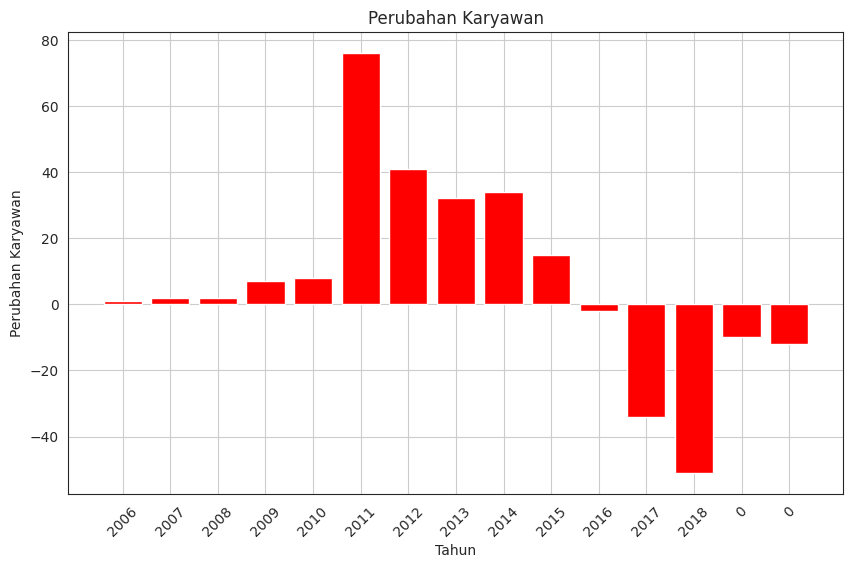

In [1107]:
import matplotlib.pyplot as plt

# Sets the plot size
plt.figure(figsize=(10, 6))

# Make a plot of increase and decrease of employees
plt.bar(df_combined.index, df_combined['Perubahan'], color='r')

# Add x and y axis labels
plt.xlabel('Tahun')
plt.ylabel('Perubahan Karyawan')

# Added plot title
plt.title('Perubahan Karyawan')

# Sets the position and label on the x-axis
plt.xticks(df_combined.index, df_combined['TahunHiring'], rotation=45)

# Displays grids
plt.grid(True)

# Display plots
plt.show()


#### Make 2 datafarmes for those who have resigned and have resigned

In [1108]:
df_resigned = df[df['TahunResign'].notnull()]
# Calculate the number of employees who have resigned based on work
df_resigned_count = df_resigned.groupby('Pekerjaan').size().reset_index(name='Jumlah Resign')

print("Resigned employee data frame:")
df_resigned_count

Resigned employee data frame:


,Pekerjaan,Jumlah Resign
0,Data Analyst,8
1,Data Engineer,3
2,Product Design (UI & UX),9
3,Product Manager,6
4,Software Engineer (Android),7
5,Software Engineer (Back End),28
6,Software Engineer (Front End),27


In [1109]:
# Filter employees who have not resigned
df_active = df[df['TahunResign'].isnull()]
# Calculate the number of employees who have not resigned based on work
df_active_count = df_active.groupby('Pekerjaan').size().reset_index(name='Jumlah Aktif')

print("\nData frames of employees who have not resigned:")
df_active_count


Data frames of employees who have not resigned:


,Pekerjaan,Jumlah Aktif
0,Data Analyst,8
1,Data Engineer,7
2,DevOps Engineer,3
3,Digital Product Manager,2
4,Machine Learning Engineer,2
5,Product Design (UI & UX),14
6,Product Design (UX Researcher),1
7,Product Manager,11
8,Scrum Master,3
9,Software Architect,1


#### Merge the two dataframes based on the Job key

In [1110]:
df_c = df_resigned_count.merge(df_active_count, on='Pekerjaan', how='outer')
df_combined = df_c.fillna(0)
df_combined['Jumlah Resign'] = df_combined['Jumlah Resign'].astype(int)

df_combined

,Pekerjaan,Jumlah Resign,Jumlah Aktif
0,Data Analyst,8,8
1,Data Engineer,3,7
2,Product Design (UI & UX),9,14
3,Product Manager,6,11
4,Software Engineer (Android),7,17
5,Software Engineer (Back End),28,81
6,Software Engineer (Front End),27,44
7,DevOps Engineer,0,3
8,Digital Product Manager,0,2
9,Machine Learning Engineer,0,2


#### Adding columns for the number of employees and the percentage of employees

In [1111]:
# Calculating the number of employees
df_combined['Jumlah Employee'] = df_combined['Jumlah Resign'] + df_combined['Jumlah Aktif']

# Calculate the percentage of employees who are still there
df_combined['Persentase Employee Masih Ada'] = (df_combined['Jumlah Aktif'] / df_combined['Jumlah Employee']) * 100



df_combined

,Pekerjaan,Jumlah Resign,Jumlah Aktif,Jumlah Employee,Persentase Employee Masih Ada
0,Data Analyst,8,8,16,50.000000
1,Data Engineer,3,7,10,70.000000
2,Product Design (UI & UX),9,14,23,60.869565
3,Product Manager,6,11,17,64.705882
4,Software Engineer (Android),7,17,24,70.833333
5,Software Engineer (Back End),28,81,109,74.311927
6,Software Engineer (Front End),27,44,71,61.971831
7,DevOps Engineer,0,3,3,100.000000
8,Digital Product Manager,0,2,2,100.000000
9,Machine Learning Engineer,0,2,2,100.000000


#### Make a presentation plot

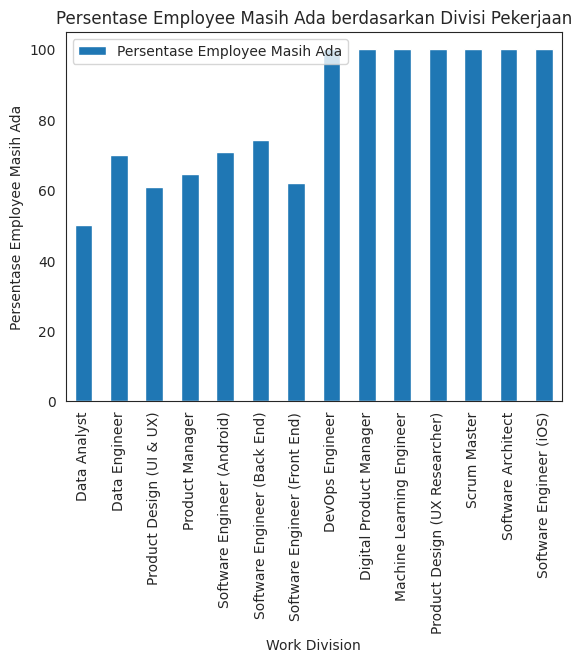

In [1112]:
# Display plots
df_combined.plot(kind='bar', x='Pekerjaan', y='Persentase Employee Masih Ada')
plt.xlabel('Work Division')
plt.ylabel('Persentase Employee Masih Ada')
plt.title('Persentase Employee Masih Ada berdasarkan Divisi Pekerjaan')
plt.show()



In [1113]:
# Mengelompokkan data berdasarkan Jenjang Karir, Performa Karyawan, dan Alasan Resign, dan menghitung jumlah employee yang resign
df_resign_aggregate = df_resigned.groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign']).size().reset_index(name='Jumlah Resign')

# Menampilkan tabel agregasi
print("Tabel Agregasi Jumlah Employee Resign:")
df_resign_aggregate


Tabel Agregasi Jumlah Employee Resign:


,JenjangKarir,PerformancePegawai,AlasanResign,Jumlah Resign
0,Freshgraduate_program,Bagus,ganti_karir,3
1,Freshgraduate_program,Bagus,jam_kerja,2
2,Freshgraduate_program,Bagus,kejelasan_karir,1
3,Freshgraduate_program,Bagus,leadership,2
4,Freshgraduate_program,Bagus,tidak_bisa_remote,1
5,Freshgraduate_program,Bagus,toxic_culture,2
6,Freshgraduate_program,Biasa,apresiasi,1
7,Freshgraduate_program,Biasa,ganti_karir,3
8,Freshgraduate_program,Biasa,internal_conflict,1
9,Freshgraduate_program,Biasa,jam_kerja,2


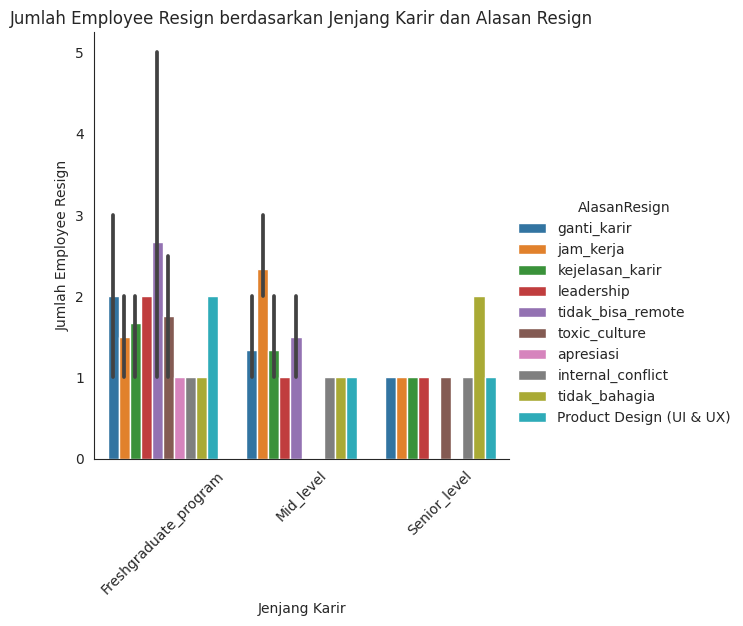

In [1114]:
sns.catplot(data=df_resign_aggregate.reset_index(), x='JenjangKarir', y='Jumlah Resign', hue='AlasanResign', kind='bar')
plt.xlabel('Jenjang Karir')
plt.ylabel('Jumlah Employee Resign')
plt.title('Jumlah Employee Resign berdasarkan Jenjang Karir dan Alasan Resign')
plt.xticks(rotation=45)
plt.show()



### Mising Value

In [1115]:
df

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,Email,TingkatPendidikan,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,TahunHiring,TahunResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,spiritedPorpoise3135@yahoo.com,Magister,1,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,NaT,2011,NaN
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,jealousGelding2239@yahoo.com,Sarjana,1,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-06-16,2014,2018.0
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,pluckyMuesli3961@icloud.com,Magister,1,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24,2011,2014.0
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,stressedTruffle1406@hotmail.com,Sarjana,0,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,NaT,2014,NaN
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,shyTermite7149@gmail.com,Sarjana,0,ganti_karir,1974-11-07,2013-11-11,2020-01-22,2018-09-06,2013,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,dopeySheep0,106034,Belum_menikah,Wanita,FullTime,Data Engineer,Mid_level,Bagus,Jakarta Pusat,Google_Search,...,dopeySheep0297@icloud.com,Sarjana,<NA>,NaN,1973-12-08,2011-09-26,2016-03-01,NaT,2011,NaN
283,yearningPorpoise4,106254,-,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Timur,LinkedIn,...,yearningPorpoise4421@yahoo.com,Sarjana,<NA>,jam_kerja,1974-12-01,2013-05-13,2020-01-28,2017-11-15,2013,2017.0
284,murkySausage9,110433,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Pusat,Diversity_Job_Fair,...,murkySausage9688@yahoo.com,Sarjana,1,ganti_karir,1969-10-30,2013-11-11,2020-01-21,2018-06-08,2013,2018.0
285,truthfulMoth4,110744,Belum_menikah,Pria,FullTime,Software Engineer (Android),Mid_level,Bagus,Jakarta Utara,Google_Search,...,truthfulMoth4663@yahoo.com,Sarjana,0,kejelasan_karir,1981-10-01,2011-05-16,2014-04-05,2018-04-01,2011,2018.0


In [1116]:
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'], format='%Y-%m-%d')
df['Resign'] = df['TanggalResign'].notnull()
df['Resign'] = df['Resign'].map({True: 'Resign', False: 'Tidak Resign'})

df.head()


,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,TingkatPendidikan,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,TahunHiring,TahunResign,Resign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,Magister,1,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,NaT,2011,NaN,Tidak Resign
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,Sarjana,1,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-06-16,2014,2018.0,Resign
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,Magister,1,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24,2011,2014.0,Resign
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,Sarjana,0,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,NaT,2014,NaN,Tidak Resign
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,Sarjana,0,ganti_karir,1974-11-07,2013-11-11,2020-01-22,2018-09-06,2013,2018.0,Resign


In [1117]:
df.isna().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
IkutProgramLOP                        256
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan                0
TanggalResign                     

In [1118]:
df['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].mode()[0], inplace=True)
df['JumlahKeikutsertaanProjek'].fillna(df['JumlahKeikutsertaanProjek'].mode()[0], inplace=True)
df['JumlahKeterlambatanSebulanTerakhir'].fillna(df['JumlahKeterlambatanSebulanTerakhir'].mode()[0], inplace=True)
df['JumlahKetidakhadiran'].fillna(df['JumlahKetidakhadiran'].mode()[0], inplace=True)
df['IkutProgramLOP'].fillna(df['IkutProgramLOP'].mode()[0], inplace=True)
df['AlasanResign'].fillna(df['AlasanResign'].mode()[0], inplace=True)
df['TanggalResign'].fillna(df['TanggalResign'].mode()[0], inplace=True)
df['TahunResign'].fillna(df['TahunResign'].mode()[0], inplace=True)

df.isna().sum()


Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
IkutProgramLOP                        0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0
TahunHiring                           0


### Handle Outliers

In [1119]:
from scipy import stats

print(f'The number of rows before filtering out the outliers: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran']:
    column_values = df[col].astype(float)  # Pastikan tipe data kolom adalah float
    column_values = column_values.fillna(column_values.mean())  # Mengisi nilai yang hilang dengan rata-rata kolom
    zscore = abs(stats.zscore(column_values))
    filtered_entries = (zscore < 3) & filtered_entries

df = df[filtered_entries]
print(f'Number of rows after filtering outliers: {len(df)}')



The number of rows before filtering out the outliers: 285
Number of rows after filtering outliers: 270


In [1120]:
# Replaces the values ​​in the EmployeeStatus column with the name object
df['StatusKepegawaian'] = df['StatusKepegawaian'].replace({0: 'kontrak', 1: 'fulltime', 2: 'Pensiun'})

# Displays unique values ​​in the EmployeeStatus column after changes
print(df['StatusKepegawaian'].value_counts())

FullTime      205
Outsource      62
Internship      3
Name: StatusKepegawaian, dtype: int64


<ipython-input-1120-52c4fccc0985>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StatusKepegawaian'] = df['StatusKepegawaian'].replace({0: 'kontrak', 1: 'fulltime', 2: 'Pensiun'})


### Feature Encoding

In [1121]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = ['Username','NomorHP','Email', 'StatusPernikahan', 'JenisKelamin','StatusKepegawaian','Pekerjaan', 'JenjangKarir',
                    'PerformancePegawai','AsalDaerah', 'HiringPlatform', 'TingkatPendidikan','AlasanResign', 'TanggalLahir', 'TanggalHiring',
                    'TanggalPenilaianKaryawan', 'TanggalPenilaianKaryawan', 'EnterpriseID', 'Resign']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])



<ipython-input-1121-0f580ff5368b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-1121-0f580ff5368b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-1121-0f580ff5368b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [1122]:
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,TingkatPendidikan,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,TahunHiring,TahunResign,Resign
0,238,234,1,0,2,11,0,3,3,2,...,1,1,7,53,16,38,2017-11-15,2011,2018.0,1
1,131,137,1,0,0,0,0,4,4,8,...,2,1,10,177,62,90,2018-06-16,2014,2018.0,0
2,193,158,4,0,0,12,0,0,3,4,...,1,1,4,67,16,34,2014-09-24,2011,2014.0,0
3,242,149,1,0,2,12,0,0,1,5,...,2,0,7,125,63,104,2017-11-15,2014,2018.0,1
4,215,240,1,1,0,7,0,0,3,5,...,2,0,2,75,60,94,2018-09-06,2013,2018.0,0


In [1123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 0 to 286
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            270 non-null    int64         
 1   EnterpriseID                        270 non-null    int64         
 2   StatusPernikahan                    270 non-null    int64         
 3   JenisKelamin                        270 non-null    int64         
 4   StatusKepegawaian                   270 non-null    int64         
 5   Pekerjaan                           270 non-null    int64         
 6   JenjangKarir                        270 non-null    int64         
 7   PerformancePegawai                  270 non-null    int64         
 8   AsalDaerah                          270 non-null    int64         
 9   HiringPlatform                      270 non-null    int64         
 10  SkorSurveyEngagement      

In [1124]:
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,TingkatPendidikan,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,TahunHiring,TahunResign,Resign
0,238,234,1,0,2,11,0,3,3,2,...,1,1,7,53,16,38,2017-11-15,2011,2018.0,1
1,131,137,1,0,0,0,0,4,4,8,...,2,1,10,177,62,90,2018-06-16,2014,2018.0,0
2,193,158,4,0,0,12,0,0,3,4,...,1,1,4,67,16,34,2014-09-24,2011,2014.0,0
3,242,149,1,0,2,12,0,0,1,5,...,2,0,7,125,63,104,2017-11-15,2014,2018.0,1
4,215,240,1,1,0,7,0,0,3,5,...,2,0,2,75,60,94,2018-09-06,2013,2018.0,0


In [1125]:
# Change theResignDate to an integer
df['TanggalResign'] = df['TanggalResign'].astype(int)

<ipython-input-1125-ab85682f2762>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TanggalResign'] = df['TanggalResign'].astype(int)


In [1126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 0 to 286
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            270 non-null    int64  
 1   EnterpriseID                        270 non-null    int64  
 2   StatusPernikahan                    270 non-null    int64  
 3   JenisKelamin                        270 non-null    int64  
 4   StatusKepegawaian                   270 non-null    int64  
 5   Pekerjaan                           270 non-null    int64  
 6   JenjangKarir                        270 non-null    int64  
 7   PerformancePegawai                  270 non-null    int64  
 8   AsalDaerah                          270 non-null    int64  
 9   HiringPlatform                      270 non-null    int64  
 10  SkorSurveyEngagement                270 non-null    int64  
 11  SkorKepuasanPegawai                 270 non-n

###Feature Selection

In [1127]:
from sklearn.feature_selection import SelectKBest, f_classif

# Use SelectKBest to select the best features
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)



### Split data train dan data test

In [1128]:
from sklearn.model_selection import train_test_split

X = df.drop(['Resign'], axis=1)
y = df['Resign']

X_selected, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Displays information about the size of the train and test data
print("Jumlah data train:", X_selected.shape[0])
print("Jumlah data test:", X_test.shape[0])

Jumlah data train: 216
Jumlah data test: 54


In [1129]:
X_selected.shape

(216, 26)

In [1130]:
y_train.shape

(216,)

In [1131]:
X_test.shape

(54, 26)

In [1132]:
y_test.shape

(54,)

In [1133]:
y_test.value_counts()

1    37
0    17
Name: Resign, dtype: int64

In [1134]:
print(X_selected.dtypes)  # Returns the data type of the X_train feature

print(y_train.dtype)  # Returns the data type of target y_train


Username                                int64
EnterpriseID                            int64
StatusPernikahan                        int64
JenisKelamin                            int64
StatusKepegawaian                       int64
Pekerjaan                               int64
JenjangKarir                            int64
PerformancePegawai                      int64
AsalDaerah                              int64
HiringPlatform                          int64
SkorSurveyEngagement                    int64
SkorKepuasanPegawai                   float64
JumlahKeikutsertaanProjek               Int64
JumlahKeterlambatanSebulanTerakhir      Int64
JumlahKetidakhadiran                    Int64
NomorHP                                 int64
Email                                   int64
TingkatPendidikan                       int64
IkutProgramLOP                          Int64
AlasanResign                            int64
TanggalLahir                            int64
TanggalHiring                     

In [1135]:
# Before undersampling
print(pd.Series(y_train).value_counts())

1    151
0     65
Name: Resign, dtype: int64


In [1136]:
# after undersampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=69)
X_undersampling, y_undersampling = rus.fit_resample(X_selected, y_train)

print(pd.Series(y_undersampling).value_counts())

0    65
1    65
Name: Resign, dtype: int64


In [1137]:
X_undersampling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            130 non-null    int64  
 1   EnterpriseID                        130 non-null    int64  
 2   StatusPernikahan                    130 non-null    int64  
 3   JenisKelamin                        130 non-null    int64  
 4   StatusKepegawaian                   130 non-null    int64  
 5   Pekerjaan                           130 non-null    int64  
 6   JenjangKarir                        130 non-null    int64  
 7   PerformancePegawai                  130 non-null    int64  
 8   AsalDaerah                          130 non-null    int64  
 9   HiringPlatform                      130 non-null    int64  
 10  SkorSurveyEngagement                130 non-null    int64  
 11  SkorKepuasanPegawai                 130 non-n

In [1138]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score, confusion_matrix

def evaluate_model(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_undersampling)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_undersampling)

    print('**EVALUATION WITH UNDERSAMPLING**\nAUC Train vs Test:')
    print(f'AUC Score Train proba: {round(roc_auc_score(y_undersampling,y_pred_proba_train[:,1]),6)}')
    print(f'AUC Score Test proba: {round(roc_auc_score(y_test,y_pred_proba[:,1]),6)}\n')

    print('Others Metrics Evaluation:')
    print(f'Test Accuracy Score : {round(accuracy_score(y_test,y_pred),4)}')
    print(f'Precision Score Test: {round(precision_score(y_test,y_pred),4)}')
    print(f'Recall Score Test : {round(recall_score(y_test,y_pred),4)}')
    print(f'F1 Score Test : {round(f1_score(y_test,y_pred),4)}\n')

    print('**CONFUSION MATRIX**')
    print(confusion_matrix(y_test, y_pred))


## Model

In [1139]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_undersampling, y_undersampling)
evaluate_model(model_lr)


**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.476923
AUC Score Test proba: 0.647059

Others Metrics Evaluation:
Test Accuracy Score : 0.6852
Precision Score Test: 0.6852
Recall Score Test : 1.0
F1 Score Test : 0.8132

**CONFUSION MATRIX**
[[ 0 17]
 [ 0 37]]


In [1140]:
from sklearn.tree import DecisionTreeClassifier
model_dtree = DecisionTreeClassifier(random_state=69)
model_dtree.fit(X_undersampling, y_undersampling)
evaluate_model(model_dtree)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 1.0
AUC Score Test proba: 1.0

Others Metrics Evaluation:
Test Accuracy Score : 1.0
Precision Score Test: 1.0
Recall Score Test : 1.0
F1 Score Test : 1.0

**CONFUSION MATRIX**
[[17  0]
 [ 0 37]]


In [1141]:
from sklearn.ensemble import RandomForestClassifier
model_rforest = RandomForestClassifier(random_state=69)
model_rforest.fit(X_undersampling, y_undersampling)
evaluate_model(model_rforest)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 1.0
AUC Score Test proba: 1.0

Others Metrics Evaluation:
Test Accuracy Score : 1.0
Precision Score Test: 1.0
Recall Score Test : 1.0
F1 Score Test : 1.0

**CONFUSION MATRIX**
[[17  0]
 [ 0 37]]


In [1142]:
from sklearn.ensemble import AdaBoostClassifier
model_adaboost = AdaBoostClassifier(random_state=69)
model_adaboost.fit(X_undersampling, y_undersampling)
evaluate_model(model_adaboost)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 1.0
AUC Score Test proba: 1.0

Others Metrics Evaluation:
Test Accuracy Score : 1.0
Precision Score Test: 1.0
Recall Score Test : 1.0
F1 Score Test : 1.0

**CONFUSION MATRIX**
[[17  0]
 [ 0 37]]


In [1143]:
from xgboost import XGBClassifier

model_xgboost = XGBClassifier(random_state=69)
model_xgboost.fit(X_undersampling, y_undersampling)
evaluate_model(model_xgboost)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 1.0
AUC Score Test proba: 1.0

Others Metrics Evaluation:
Test Accuracy Score : 1.0
Precision Score Test: 1.0
Recall Score Test : 1.0
F1 Score Test : 1.0

**CONFUSION MATRIX**
[[17  0]
 [ 0 37]]


### Tunnning Hyperparameter

In [1144]:
def evaluation_tuned(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_undersampling)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_undersampling)

    print('**EVALUATION WITH UNDERSAMPLING**\nAUC Train vs Test:')
    print(f'AUC Score Train proba: {round(roc_auc_score(y_undersampling,y_pred_proba_train[:,1]),6)}')
    print(f'AUC Score Test proba: {round(roc_auc_score(y_test,y_pred_proba[:,1]),6)}\n')

    print('Others Metrics Evaluation:')
    print(f'Test Accuracy Score : {round(accuracy_score(y_test,y_pred),4)}')
    print(f'Precision Score Test: {round(precision_score(y_test,y_pred),4)}')
    print(f'Recall Score Test : {round(recall_score(y_test,y_pred),4)}')
    print(f'F1 Score Test : {round(f1_score(y_test,y_pred),4)}\n')

    print('**CONFUSION MATRIX**')
    print(confusion_matrix(y_test, y_pred))

In [1145]:
logreg = LogisticRegression()
logreg_hyparameters = {"penalty": ['l1', 'l2'],
                       "C":[float(x) for x in np.linspace(0.001, 10, 100)]}

tuned_logreg = RandomizedSearchCV(logreg, logreg_hyparameters, cv = 5, random_state=69, n_jobs=-1, scoring='recall')
tuned_logreg.fit(X_undersampling, y_undersampling)
print(f'Best Parameter: {tuned_logreg.best_params_}')

Best Parameter: {'penalty': 'l2', 'C': 2.324}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [1146]:
evaluation_tuned(tuned_logreg)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.476923
AUC Score Test proba: 0.647059

Others Metrics Evaluation:
Test Accuracy Score : 0.6852
Precision Score Test: 0.6852
Recall Score Test : 1.0
F1 Score Test : 0.8132

**CONFUSION MATRIX**
[[ 0 17]
 [ 0 37]]


In [1147]:
dtree = DecisionTreeClassifier()
dtree_hyparameters = {"criterion":['gini','entropy'],
                      "max_depth":[5,14,24],
                      "min_samples_split":[2,10,100],
                      "min_samples_leaf":[2,10,100],
                      "max_features":['auto','sqrt']}

tuned_dtree = RandomizedSearchCV(dtree, dtree_hyparameters, cv=5, random_state=69, n_jobs=-1, scoring='recall')
tuned_dtree.fit(X_undersampling, y_undersampling)
print(f'Best Parameter: {tuned_dtree.best_params_}')

Best Parameter: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'gini'}


In [1148]:
evaluation_tuned(tuned_dtree)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.977633
AUC Score Test proba: 0.81717

Others Metrics Evaluation:
Test Accuracy Score : 0.7963
Precision Score Test: 0.8824
Recall Score Test : 0.8108
F1 Score Test : 0.8451

**CONFUSION MATRIX**
[[13  4]
 [ 7 30]]


In [1149]:
rforest = RandomForestClassifier()
rforest_hyparameters = {"n_estimators":[5,10,20,30],
                        "criterion":['gini','entropy'],
                        "max_depth":[5,10,15],
                        "min_samples_split":[5,10,20],
                        "min_samples_leaf":[5,10,20],
                        "max_features":['auto','sqrt']}

tuned_rforest = RandomizedSearchCV(rforest, rforest_hyparameters, cv = 5, random_state=69,n_jobs=-1, scoring='recall')
tuned_rforest.fit(X_undersampling, y_undersampling)
print(f'Best Parameter: {tuned_rforest.best_params_}')

Best Parameter: {'n_estimators': 5, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 15, 'criterion': 'entropy'}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [1150]:
evaluation_tuned(tuned_rforest)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 1.0
AUC Score Test proba: 0.988871

Others Metrics Evaluation:
Test Accuracy Score : 0.9259
Precision Score Test: 0.9459
Recall Score Test : 0.9459
F1 Score Test : 0.9459

**CONFUSION MATRIX**
[[15  2]
 [ 2 35]]


In [1151]:
%%time
adaboost = AdaBoostClassifier()
adaboost_hyparameters = {"n_estimators": [75, 80], # best params 75
                         "learning_rate": [0.5, 0.7], # best params 0.5
                         "algorithm": ['SAMME.R']} # best params SAMME.R

tuned_adaboost = RandomizedSearchCV(adaboost, adaboost_hyparameters, cv=5, random_state=69, n_jobs=-1, scoring='recall')
tuned_adaboost.fit(X_undersampling, y_undersampling)
print(f'Best Parameter: {tuned_adaboost.best_params_}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameter: {'n_estimators': 75, 'learning_rate': 0.5, 'algorithm': 'SAMME.R'}
CPU times: user 249 ms, sys: 8.62 ms, total: 257 ms
Wall time: 2.75 s


In [1152]:
evaluation_tuned(tuned_adaboost)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 1.0
AUC Score Test proba: 1.0

Others Metrics Evaluation:
Test Accuracy Score : 1.0
Precision Score Test: 1.0
Recall Score Test : 1.0
F1 Score Test : 1.0

**CONFUSION MATRIX**
[[17  0]
 [ 0 37]]


In [1153]:
xgboost = XGBClassifier()  # set n_estimators to 190
xgboost_hyparameters = {
    'max_depth': [3, 4], #best4
    'xgboost__tree_method' : ['auto', 'exact', 'approx', 'hist'],
    'learning_rate': [0.2], #best
    'n_estimators': [190], #best190
    'gamma': [0, 0.1], #best0
    'subsample': [0.6, 0.7], #best0.6
    'colsample_bytree': [0.7, 0.8, 0.9], #best 0.8
    'min_child_weight': [1, 2] #best3
}

tuned_xgboost = RandomizedSearchCV(xgboost, xgboost_hyparameters, cv=5, random_state=69, n_jobs=-1, scoring='recall')
eval_set = [(X_undersampling, y_undersampling), (X_test, y_test)]
tuned_xgboost.fit(X_undersampling, y_undersampling, early_stopping_rounds=10, eval_metric='auc', eval_set=eval_set)
print(f'Best Parameter: {tuned_xgboost.best_params_}')

[09:52:21] WARNING: ../src/learner.cc:767: 
Parameters: { "xgboost__tree_method" } are not used.

[0]	validation_0-auc:1.00000	validation_1-auc:1.00000
[1]	validation_0-auc:1.00000	validation_1-auc:1.00000
[2]	validation_0-auc:1.00000	validation_1-auc:1.00000
[3]	validation_0-auc:1.00000	validation_1-auc:1.00000
[4]	validation_0-auc:1.00000	validation_1-auc:1.00000
[5]	validation_0-auc:1.00000	validation_1-auc:1.00000
[6]	validation_0-auc:1.00000	validation_1-auc:1.00000
[7]	validation_0-auc:1.00000	validation_1-auc:1.00000
[8]	validation_0-auc:1.00000	validation_1-auc:1.00000
[9]	validation_0-auc:1.00000	validation_1-auc:1.00000
[10]	validation_0-auc:1.00000	validation_1-auc:1.00000
Best Parameter: {'xgboost__tree_method': 'exact', 'subsample': 0.7, 'n_estimators': 190, 'min_child_weight': 2, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.7}


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [1154]:
evaluation_tuned(tuned_xgboost)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 1.0
AUC Score Test proba: 1.0

Others Metrics Evaluation:
Test Accuracy Score : 1.0
Precision Score Test: 1.0
Recall Score Test : 1.0
F1 Score Test : 1.0

**CONFUSION MATRIX**
[[17  0]
 [ 0 37]]


In [1155]:
# confusion matrix after hyperparameter tuning
logreg_cm = confusion_matrix(y_test, tuned_logreg.predict(X_test))
dtree_cm = confusion_matrix(y_test, tuned_dtree.predict(X_test))
rforest_cm = confusion_matrix(y_test, tuned_rforest.predict(X_test))
adaboost_cm = confusion_matrix(y_test, tuned_adaboost.predict(X_test))
xgboost_cm = confusion_matrix(y_test, tuned_xgboost.predict(X_test))


In [1156]:
def dataframe_to_plot(title, classification_cm) -> pd.DataFrame:
    tn, fp, fn, tp = classification_cm.ravel()

    accuracy = round(((tp+tn) / (tn + tp + fn + fp)),4)
    sensitivity = round((tp / (fn + tp)),4)
    precision = round((tp / (tp + fp)),4)
    f1 = round(((2 * (1/((1/precision) + (1/sensitivity))))), 4)

    foo = pd.DataFrame(data=[f1, accuracy, sensitivity, precision],
             columns=[title],
             index=["F1","Accuracy", "Recall", "Precision"])

    return foo

logreg_df = dataframe_to_plot('Tuned Logistic Regression', logreg_cm)
dtree_df = dataframe_to_plot('Tuned Decision Tree', dtree_cm)
rforest_df = dataframe_to_plot('Tuned Random Forest', rforest_cm)
adaboost_df = dataframe_to_plot('Tuned Adaboost', adaboost_cm)
xgboost_df = dataframe_to_plot('Tuned XGBoost', xgboost_cm)


In [1157]:
add_eval_logreg = pd.DataFrame(data=[round(roc_auc_score(y_undersampling,(tuned_logreg.predict_proba(X_undersampling))[:,1]),5),
                                     round(roc_auc_score(y_test,(tuned_logreg.predict_proba(X_test))[:,1]),5)],
                               columns = ['Tuned Logistic Regression'],
                               index=['AUC-Proba Train','AUC-Proba Test'])

add_eval_dtree = pd.DataFrame(data=[round(roc_auc_score(y_undersampling,(tuned_dtree.predict_proba(X_undersampling))[:,1]),5),
                                     round(roc_auc_score(y_test,(tuned_dtree.predict_proba(X_test))[:,1]),5)],
                               columns = ['Tuned Decision Tree'],
                               index=['AUC-Proba Train','AUC-Proba Test'])

add_eval_rforest = pd.DataFrame(data=[round(roc_auc_score(y_undersampling,(tuned_rforest.predict_proba(X_undersampling))[:,1]),5),
                                     round(roc_auc_score(y_test,(tuned_rforest.predict_proba(X_test))[:,1]),5)],
                               columns = ['Tuned Random Forest'],
                               index=['AUC-Proba Train','AUC-Proba Test'])

add_eval_adaboost = pd.DataFrame(data=[round(roc_auc_score(y_undersampling,(tuned_adaboost.predict_proba(X_undersampling))[:,1]),5),
                                     round(roc_auc_score(y_test,(tuned_adaboost.predict_proba(X_test))[:,1]),5)],
                               columns = ['Tuned Adaboost'],
                               index=['AUC-Proba Train','AUC-Proba Test'])


add_eval_xgboost = pd.DataFrame(data=[round(roc_auc_score(y_undersampling,(tuned_xgboost.predict_proba(X_undersampling))[:,1]),5),
                                      round(roc_auc_score(y_test,(tuned_xgboost.predict_proba(X_test))[:,1]),5)],
                                columns = ['Tuned XGBoost'],
                                index=['AUC-Proba Train','AUC-Proba Test'])



In [1158]:
logreg_df = pd.concat([add_eval_logreg,logreg_df])
dtree_df = pd.concat([add_eval_dtree,dtree_df])
rforest_df = pd.concat([add_eval_rforest,rforest_df])
adaboost_df = pd.concat([add_eval_adaboost,adaboost_df])
xgboost_df = pd.concat([add_eval_xgboost,xgboost_df])


In [1159]:
logreg_df = logreg_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])
dtree_df = dtree_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])
rforest_df = rforest_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])
adaboost_df = adaboost_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])
xgboost_df = xgboost_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])


In [1160]:
class Colors:
    LightGray = "#ff0000"
    Teal = "#0d5388"
    LightCyan = "#fc9f3c"

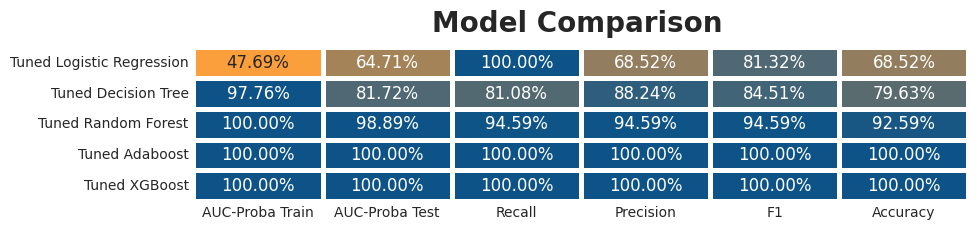

In [1161]:
import matplotlib
plt.rcParams['font.family'] = 'sans-serif'


df_models = round(pd.concat([logreg_df, dtree_df, rforest_df, adaboost_df, xgboost_df], axis=1),4)
colors = [Colors.LightGray, Colors.LightCyan, Colors.Teal]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


fig = plt.figure(figsize=(10,8),dpi=100, facecolor='white') # create figure
gs = fig.add_gridspec(3, 3, wspace=0.1, hspace=0.5)

ax0 = fig.add_subplot(gs[0:1, :])
ax0.patch.set_facecolor('white')
sns.heatmap(df_models.T, cmap=colormap, annot=True,fmt=".2%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
ax0.patch.set_facecolor('white')
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax0.text(1.85,-0.5,'Model Comparison',fontsize=20,fontweight='bold',fontfamily='serif', fontname='Tw Cen MT')

fig.show()

Decisison tree Score Before Hyperparameter Tuning
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        65

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130

Decisision tree Score After Hyperparameter Tuning
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        65
           1       0.98      0.89      0.94        65

    accuracy                           0.94       130
   macro avg       0.94      0.94      0.94       130
weighted avg       0.94      0.94      0.94       130



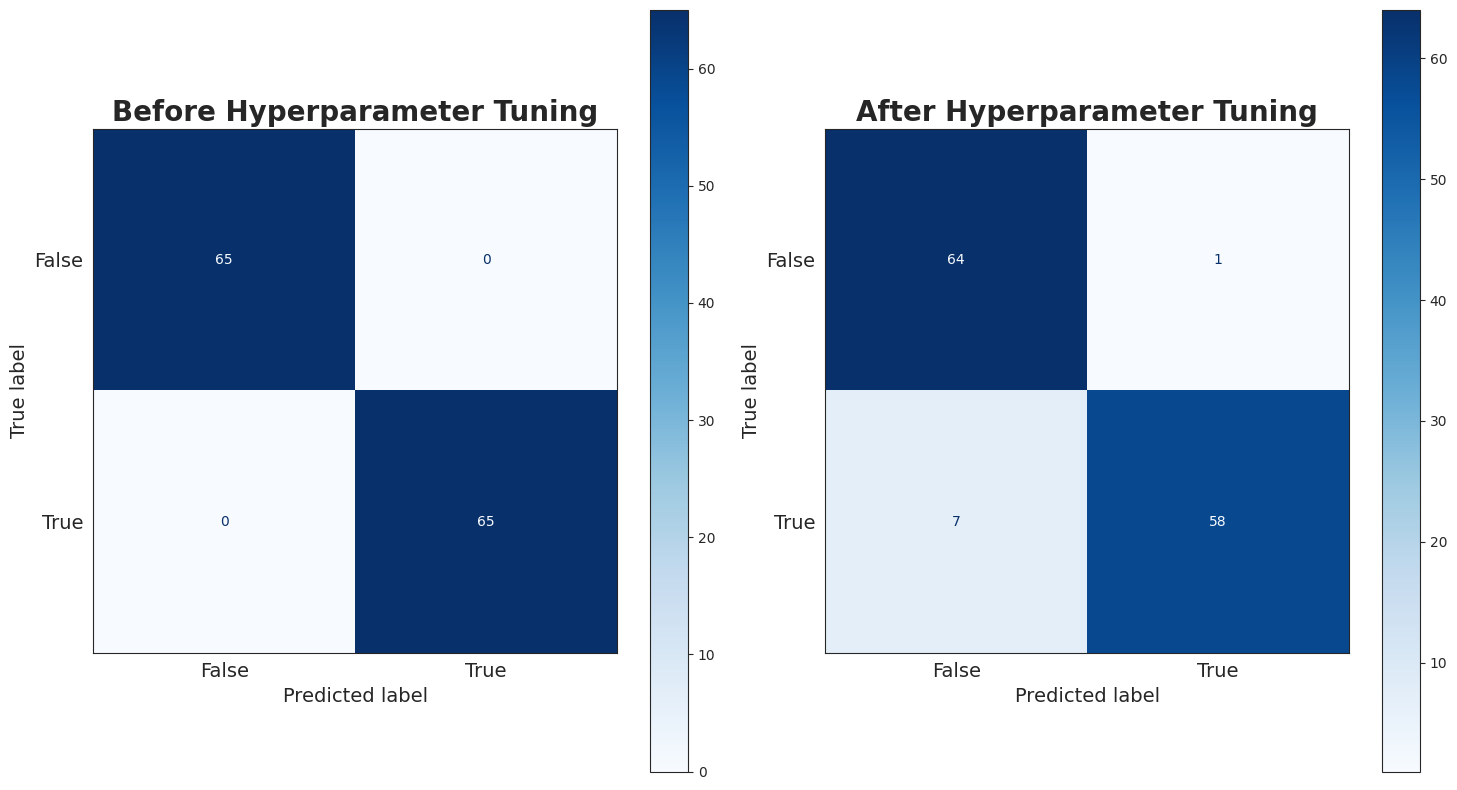

In [1162]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
plt.rcParams['font.family'] = 'sans-serif'
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.set_style("white")

# adjust font size of axis labels
ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)

# adjust font size of x and y axis labels
ax[0].set_xlabel("Predicted Labels", fontsize=14)
ax[0].set_ylabel("True Labels", fontsize=14)
ax[1].set_xlabel("Predicted Labels", fontsize=14)
ax[1].set_ylabel("True Labels", fontsize=14)

ax[0].set_title("Before Hyperparameter Tuning", fontsize=20, weight='bold')
ax[1].set_title("After Hyperparameter Tuning", fontsize=20, weight='bold')

# Set threshold value
threshold = 0.6

# Get predicted probabilities
y_pred_probs_before_tuning = model_dtree.predict_proba(X_undersampling)[:, 1]
y_pred_probs_after_tuning = tuned_dtree.predict_proba(X_undersampling)[:, 1]

# Apply threshold to get binary labels
y_pred_before_tuning = (y_pred_probs_before_tuning > threshold).astype(int)
y_pred_after_tuning = (y_pred_probs_after_tuning > threshold).astype(int)

print("Decisison tree Score Before Hyperparameter Tuning")
print(metrics.classification_report(y_undersampling, y_pred_before_tuning))
metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_undersampling, y_pred_before_tuning),
    display_labels=[False, True]).plot(ax=ax[0], cmap='Blues')

print("Decisision tree Score After Hyperparameter Tuning")
print(metrics.classification_report(y_undersampling, y_pred_after_tuning))
metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_undersampling, y_pred_after_tuning),
    display_labels=[False, True]).plot(ax=ax[1], cmap='Blues')
plt.tight_layout()
plt.show()

In [1163]:
from sklearn.metrics import roc_curve
from scipy.stats import ks_2samp

# Before Hyperparameter Tuning
y_pred_before_tuning_proba = model_dtree.predict_proba(X_undersampling)[:,1]
fpr_, tpr_, thresholds_ = roc_curve(y_undersampling, y_pred_before_tuning_proba)

roc_auc_value_ = roc_auc_score(y_undersampling, y_pred_before_tuning_proba).round(4)
gini_value_ = ((2*roc_auc_value_)-1).round(4)
stat_KS_, p_value_ = ks_2samp(y_undersampling, y_pred_before_tuning_proba)
df_fpr_tpr_before = pd.DataFrame({'FPR':fpr_, 'TPR':tpr_, 'Threshold':thresholds_})

# After Hyperparameter Tuning
y_pred_after_tuning_proba = tuned_dtree.predict_proba(X_undersampling)[:,1]
fpr, tpr, thresholds = roc_curve(y_undersampling, y_pred_after_tuning_proba)

roc_auc_value = roc_auc_score(y_undersampling, y_pred_after_tuning_proba).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)
stat_KS, p_value = ks_2samp(y_undersampling, y_pred_after_tuning_proba)
df_fpr_tpr_after = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})

#Table
tabel_perform_model = pd.DataFrame({'Kategori (Data Test)':['Before Hyperparamater Tunning', 'After Hyperparamater Tunning'],
                             'AUC_ROC' : [roc_auc_value_, roc_auc_value],
                             'Gini' : [gini_value_, gini_value],
                            'KS' : [round(stat_KS_,4), round(stat_KS,4)]})

In [1164]:
tabel_perform_model

,Kategori (Data Test),AUC_ROC,Gini,KS
0,Before Hyperparamater Tunning,1.0000,1.0000,0.0000
1,After Hyperparamater Tunning,0.9776,0.9552,0.2615


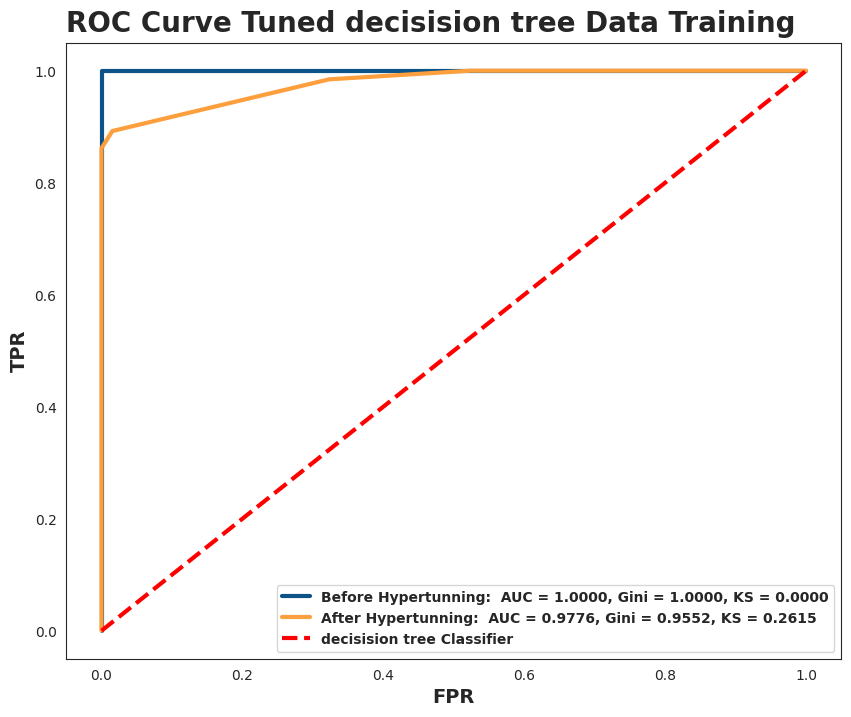

In [1165]:

fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.plot()
plt.plot(fpr_, tpr_, '#0d5388', label='%s AUC = %0.4f, Gini = %0.4f, KS = %0.4f' % ('Before Hypertunning: ', tabel_perform_model['AUC_ROC'][0], tabel_perform_model['Gini'][0], tabel_perform_model['KS'][0]),linewidth=3)
plt.plot(fpr, tpr, '#fc9f3c', label='%s AUC = %0.4f, Gini = %0.4f, KS = %0.4f' % ('After Hypertunning: ', tabel_perform_model['AUC_ROC'][1], tabel_perform_model['Gini'][1], tabel_perform_model['KS'][1]),linewidth=3)
plt.plot([0,1], [0,1], 'r--', label='decisision tree Classifier', linewidth=3)
plt.text(x=-0.05,y=1.07,s="ROC Curve Tuned decisision tree Data Training",fontsize=20,weight='bold')
plt.xlabel('FPR',weight='bold',fontsize=14)
plt.ylabel('TPR',weight='bold',fontsize=14)
legend_properties = {'weight':'bold'}
plt.legend(prop=legend_properties)
plt.show()

decisison tree Score After Hyperparameter Tuning on Test Set
              precision    recall  f1-score   support

           0       0.65      0.76      0.70        17
           1       0.88      0.81      0.85        37

    accuracy                           0.80        54
   macro avg       0.77      0.79      0.77        54
weighted avg       0.81      0.80      0.80        54



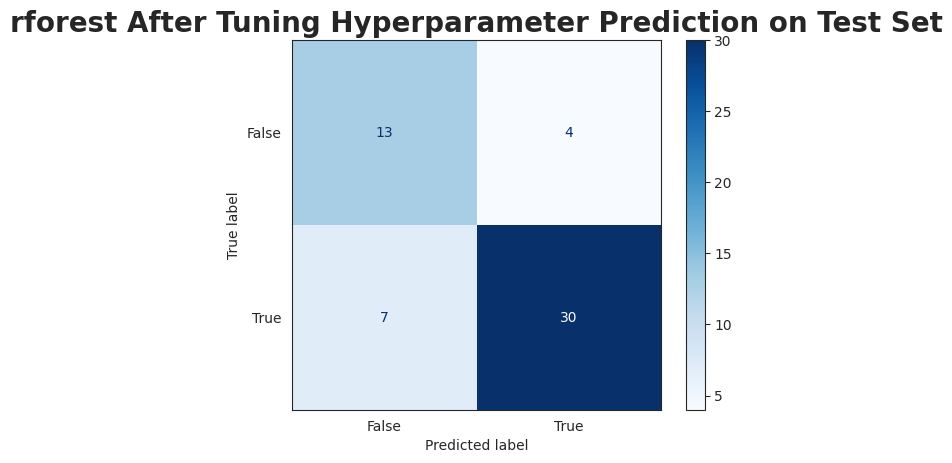

In [1166]:
matplotlib.rcParams['font.family'] = 'Tw Cen MT'
plt.rcParams['font.family'] = 'sans-serif'
y_pred_test_tuned = tuned_dtree.predict(X_test)
y_pred_test_tuned_proba = tuned_dtree.predict_proba(X_test)[:,1]

print("decisison tree Score After Hyperparameter Tuning on Test Set")
print(metrics.classification_report(y_test,y_pred_test_tuned))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test_tuned)
metrics.ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix,
    display_labels = [False, True]).plot(cmap='Blues')
plt.title("rforest After Tuning Hyperparameter Prediction on Test Set", fontsize=20, fontweight='bold');

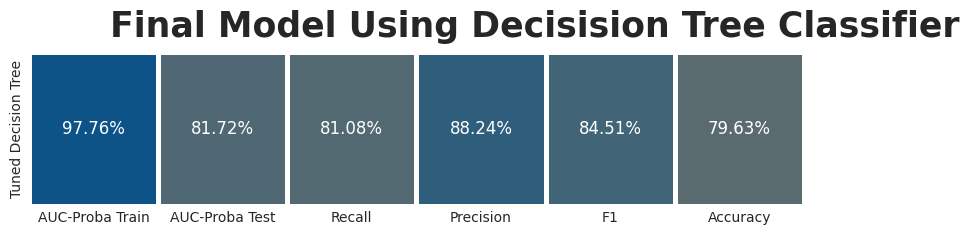

In [1167]:
plt.rcParams['font.family'] = 'sans-serif'
df_models = round(pd.concat([dtree_df], axis=1),4)
colors = [Colors.LightGray, Colors.LightCyan, Colors.Teal]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


fig = plt.figure(figsize=(10,8),dpi=100, facecolor='white') # create figure
gs = fig.add_gridspec(3, 2, wspace=0.1, hspace=0.5)

ax0 = fig.add_subplot(gs[0:1, :])
ax0.patch.set_facecolor('white')
sns.heatmap(df_models.T, cmap=colormap, annot=True,fmt=".2%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
ax0.patch.set_facecolor('white')
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax0.text(0.625,-0.1,'Final Model Using Decisision Tree Classifier',fontsize=25,fontweight='bold',fontfamily='serif', fontname='Tw Cen MT')

fig.show()

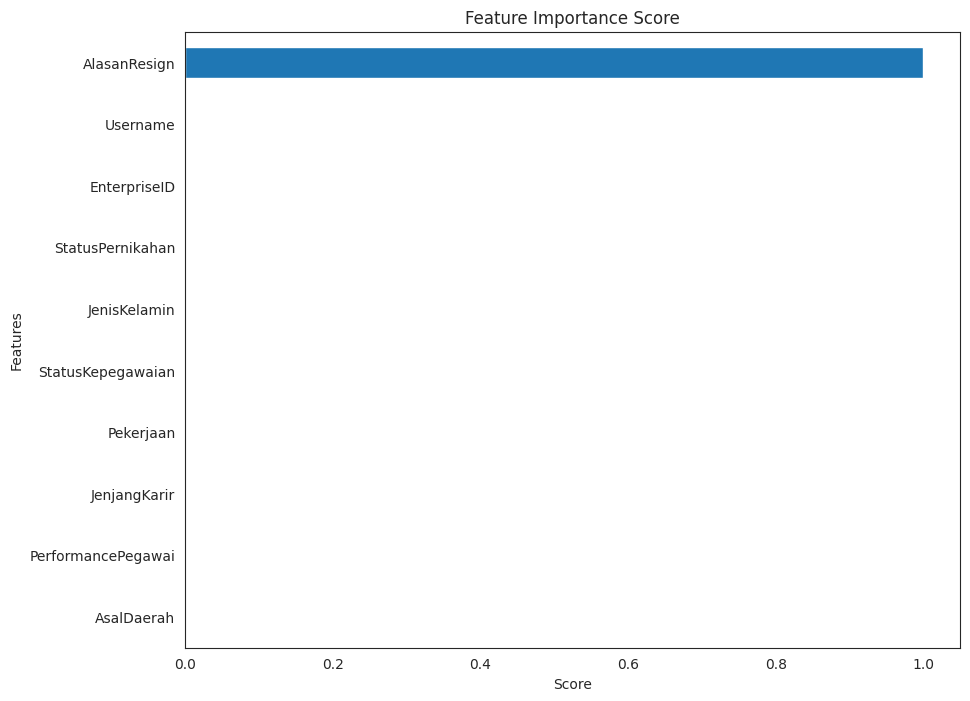

In [1168]:
plt.rcParams['font.family'] = 'sans-serif'
def show_feature_importance(model, X):
    importances = model.feature_importances_
    feat_importances = pd.Series(importances, index=X.columns)
    ax = feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()
    plt.xlabel('Score')
    plt.ylabel('Features')
    plt.title('Feature Importance Score')
    plt.show()

# Assuming tuned_dtree is your trained DecisionTreeClassifier model
tuned_dtree = DecisionTreeClassifier()
tuned_dtree.fit(X, y)  # X and y represent your training data

show_feature_importance(tuned_dtree, X)


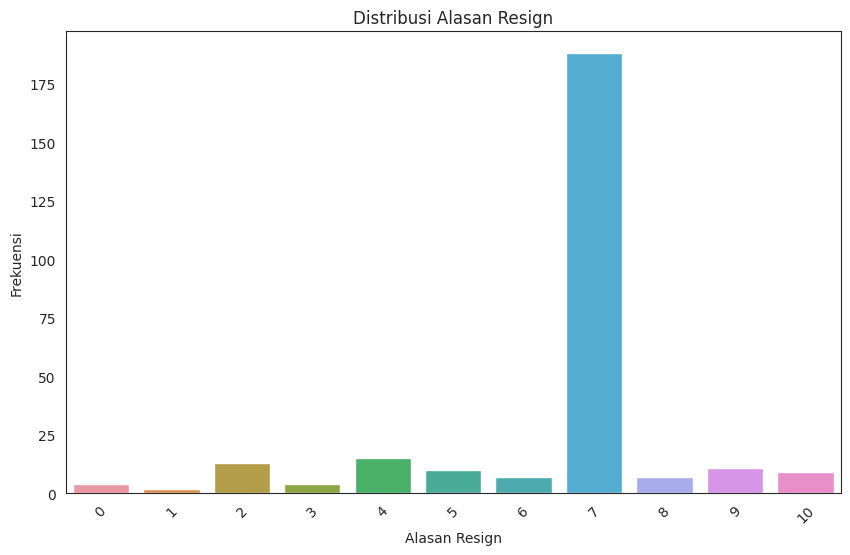

In [1169]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of times each value in the column "Reason to Resign"
reason_counts = df['AlasanResign'].value_counts()

# Creating bar plots using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=reason_counts.index, y=reason_counts.values)
plt.xlabel('Alasan Resign')
plt.ylabel('Frekuensi')
plt.title('Distribusi Alasan Resign')
plt.xticks(rotation=45)  # Set the x label rotation if needed
plt.show()
